In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Import data
path = "appointment.csv"

noshow_df = pd.read_csv(path)

In [26]:
noshow_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [28]:
# Only want to inlcude rows that have values for the outcome we are trying to predict
noshow_df = noshow_df.dropna(subset=['No-show'])
noshow_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
noshow_df.dtypes

Patient_ID                  int64
Age                       float64
Gender                     object
Insurance_Type             object
Chronic_Disease            object
Mental_Health_Status       object
Employment_Status          object
Education_Level            object
Transportation_Access      object
Distance_from_Facility    float64
Area_Type                  object
Booking_Date               object
Appointment_Date           object
Appointment_Outcome        object
dtype: object

In [31]:
# No duplicates
dup_patients = noshow_df[noshow_df.duplicated(['PatientId'])]
dup_patients

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [33]:
# Convert 'Booking_Date' and 'Appointment_Date' columns to datetime if not already
noshow_df[['ScheduledDay', 'AppointmentDay']] = noshow_df[['ScheduledDay', 'AppointmentDay']].apply(pd.to_datetime, errors='coerce')

# Calculate the difference in days, handling NaT values
diff = (noshow_df['AppointmentDay'] - noshow_df['ScheduledDay']).dt.days

# Insert 'Days Diff' column at position 13
noshow_df.insert(13, 'Days Diff', diff)

noshow_df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Days Diff,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,-1,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,-1,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,-1,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,-1,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,-1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,34,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,34,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,40,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,40,No


In [44]:
print(noshow_df.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Days Diff',
       'No-show'],
      dtype='object')


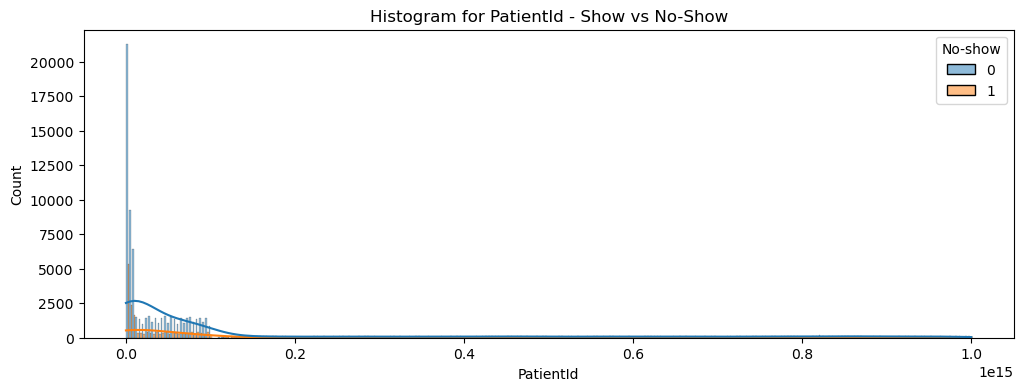

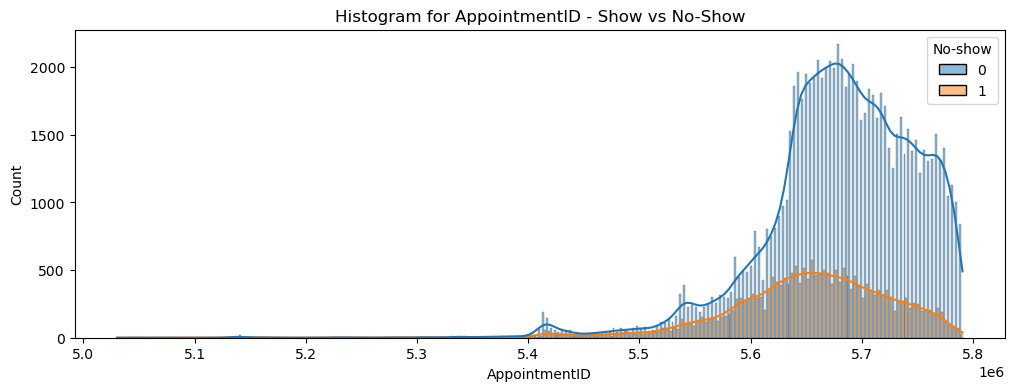

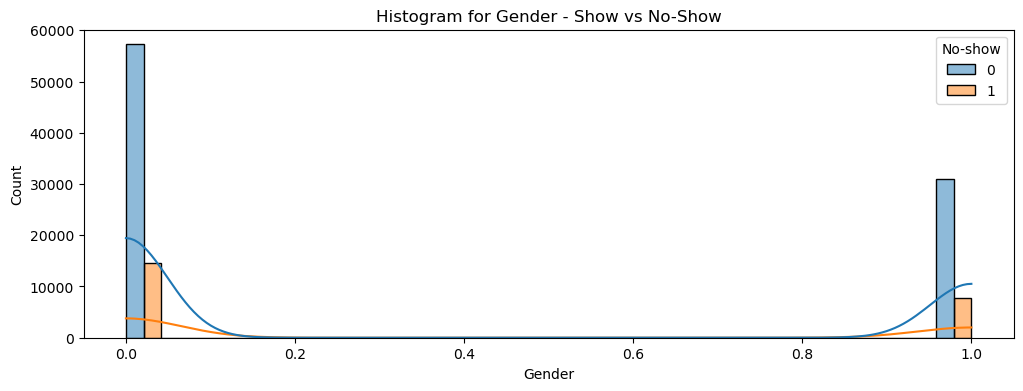

KeyboardInterrupt: 

In [45]:
# Really evenly distributed data. Exception: About a 30% drop for patients around age 50. 
for column in noshow_df.columns:
    # Check if the column is numeric (int or float)
    if pd.api.types.is_numeric_dtype(noshow_df[column]):
        plt.figure(figsize=(12, 4))
        sns.histplot(data=noshow_df, x=column, hue="No-show", multiple="dodge", kde=True)
        plt.title(f'Histogram for {column} - Show vs No-Show')
        plt.show()
    else:
        # Handle categorical variables with countplot
        plt.figure(figsize=(12, 4))
        sns.countplot(data=noshow_df, x=column, hue="No-show")
        plt.title(f'Countplot for {column} - Show vs No-Show')
        plt.show()

In [ ]:
    plt.figure(figsize=(12,4))
    sns.histplot(data=noshow_df[column])
    plt.title(f'{column}')
    plt.show()

In [ ]:
selected_columns = ['Age', 'Insurance_Type', 'Employment_Status', 'Distance_from_Facility', 'Days Diff']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=noshow_df[selected_columns])
plt.title('Box Plots')
plt.xticks(rotation=45)
plt.show()

KeyError: "['Insurance_Type', 'Employment_Status', 'Distance_from_Facility'] not in index"

<Figure size 1200x800 with 0 Axes>

In [42]:
# Assuming 'Appointment_Outcome' is the target variable
target_column = 'No-show'

# Drop rows with missing target values
noshow_df.dropna(subset=[target_column], inplace=True)

# Drop the 'Timestamp' column
noshow_df.drop('Timestamp', axis=1, inplace=True)

# Separate numerical and categorical columns
numerical_columns = noshow_df.select_dtypes(include=['number']).columns
categorical_columns = noshow_df.select_dtypes(include=['object']).columns

# Encode the categorical columns
for col in categorical_columns:
    noshow_df[col] = noshow_df[col].astype('category')
    noshow_df[col] = noshow_df[col].cat.codes

# Create transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies transformers to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Split the data into features and target
X = noshow_df.drop(target_column, axis=1)
y = noshow_df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report_str)



KeyError: "['Timestamp'] not found in axis"